### Imports

---

In [1]:
import warnings
import numpy as np
import pandas as pd

warnings.filterwarnings("ignore")

In [2]:
from functions.data_filtering import process_data
from functions.data_extraction import extract_date_from_file_path, analyze_seismic_data

### Parameters

---

In [3]:
# Define the specific time of interest
time = "04:30:00"

# This determines the time range around the specific time for data trimming
window_size = 600 

# Specify the station code
station = 'R716E'

### Read Files

---

In [4]:
# Read file paths from file_paths.txt
with open("filepaths_test.txt", "r") as file:
    file_paths = [line.strip() for line in file if not line.startswith("#")]

### Plot Stream Data

The goal of this method is to have a quick insight on what the data looks like. 

We can easily see by the plot and by ratio that some data are much noisier than others. 

---

Signal-to-Noise Ratio (SNR) for 2024-05-18: 14.49


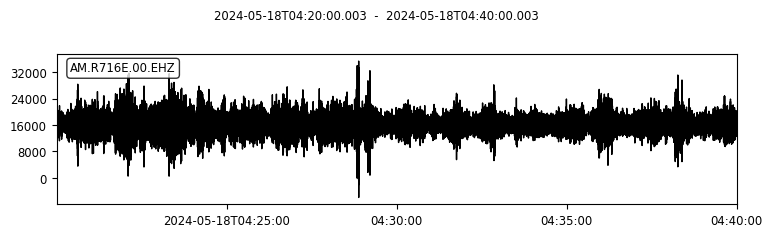

Signal-to-Noise Ratio (SNR) for 2024-05-19: 18.56


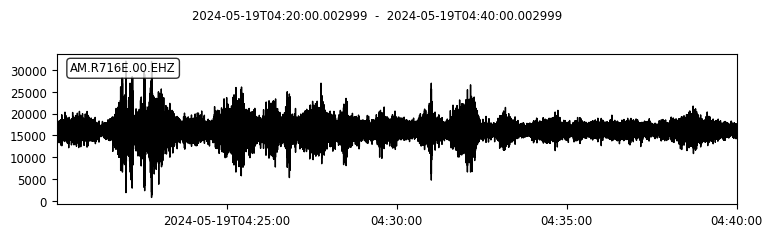

Signal-to-Noise Ratio (SNR) for 2024-05-20: 12.93


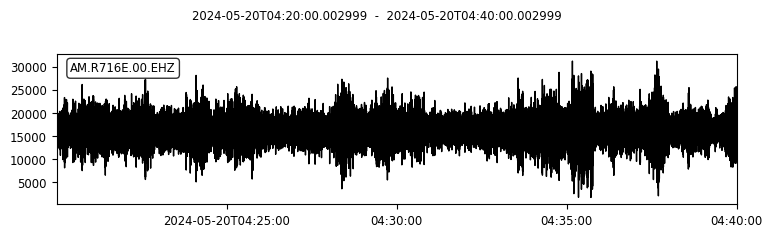

Signal-to-Noise Ratio (SNR) for 2024-05-21: 14.70


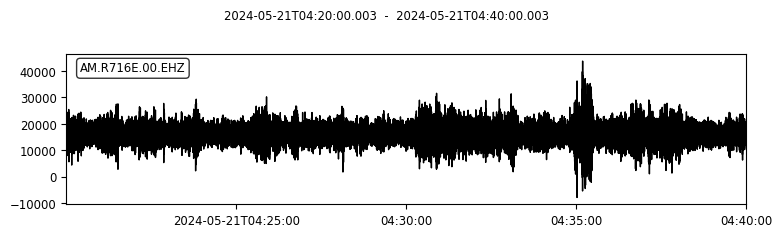

Signal-to-Noise Ratio (SNR) for 2024-05-22: 14.09


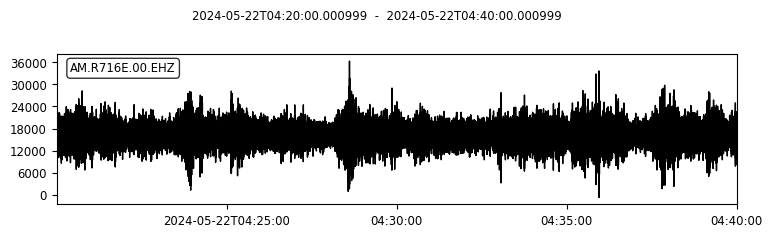

Number of SNRs greater than 20: 0


In [5]:
# Initialize a counter for SNRs greater than 20
count_high_snr = 0

# Process and plot data for each file path
for file_path in file_paths:
    # Extract the date from the file path
    date = extract_date_from_file_path(file_path)
    
    # Process the data for the given date
    stream = process_data(date, time, window_size, file_path)
    
    # Select the trace of interest
    tr = stream[0]

    # Get the data as a numpy array
    data = tr.data

    # Estimate signal-to-noise ratio (SNR)
    signal_level = np.max(data)
    noise_level = np.std(data)
    snr = signal_level / noise_level

    # Print the SNR
    print(f"Signal-to-Noise Ratio (SNR) for {date}: {snr:.2f}")
    
    # Check if the SNR is greater than 20
    if snr > 20:
        count_high_snr += 1
    
    # Plot the processed stream
    stream.plot()

# Print the count of SNRs greater than 20
print(f"Number of SNRs greater than 20: {count_high_snr}")

> :warning: **Missing Data**: Some data were excluded becuase of its poor quality upon collection in the sensor.

### Numerical Data Conversion

---

In [6]:
results_list = []

# Process and analyze data for each file path
for file_path in file_paths:
    # Extract the date from the file path
    date = extract_date_from_file_path(file_path)
    
    # Process the data for the given date
    stream = process_data(date, time, window_size, file_path)
    
    # Analyze the seismic data stream
    analysis_results = analyze_seismic_data(stream)
    
    # Append the analysis results to the results_list
    results_list.append(analysis_results)

# Create a pandas DataFrame from the results_list
df = pd.DataFrame(results_list)

In [7]:
# View the tabular data 
df

,Date,Data Quality,Standard Deviation,Peak-to-Peak Amplitude,Root Mean Square (RMS),Total PSD,Mean PSD,Signal-to-Noise Ratio (SNR),Median Absolute Deviation (MAD),Kurtosis,Skewness,Interquartile Range (IQR),Autocorrelation Peak,Wavelet Energy
0,2024-05-18,D,2436.6725,41251,16384.4307,1.522036e+07,117987.2550,14.4939,1423.0,2.2288,-0.0210,2846.0,8,3.225547e+13
1,2024-05-19,D,1727.0901,31264,16295.1009,7.613222e+06,59017.2232,18.5619,833.0,5.7318,0.0004,1665.0,7,3.191307e+13
2,2024-05-20,D,2412.0622,29523,16380.7832,1.485626e+07,115164.8272,12.9313,1459.0,1.3856,-0.0215,2918.0,5,3.226290e+13
3,2024-05-21,D,2979.4640,51672,16475.6825,2.273977e+07,176277.3002,14.6983,1751.0,2.6247,0.0153,3501.0,6,3.261738e+13
4,2024-05-22,D,2578.8843,37098,16415.3213,1.698792e+07,131689.3211,14.0949,1565.0,1.4430,-0.0213,3129.0,6,3.240496e+13


In [8]:
# Save the data
df.to_csv("csv_data/test_ehz_statistical_data.csv", index=False)